### 12.3.8 회귀 신경망 실습

* 신경망을 이용하여 보스턴 집값을 예측하는 모형 생성하기<br>

```python
from sklearn import datasets
from sklearn.model_selection import train_test_split

import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt
import pandas as pd

# 랜덤 시드 설정
np.random.seed(0)
tf.random.set_seed(0)

# 데이터 불러오기
raw_boston = datasets.load_boston()

# 피처, 타깃 데이터 설정
X = raw_boston.data
Y = raw_boston.target

# 피처 데이터 차원 확인
print(X.shape)

# 타깃 데이터 종류 확인
print(set(Y))

# 훈련/테스트 데이터 분할
x_tn, x_te, y_tn, y_te = train_test_split(X, Y, random_state = 0)

# 신경망 생성
n_feat = x_tn.shape[1]
epo = 30

model = Sequential()
model.add(Dense(20, input_dim = n_feat, activation = 'relu'))
model.add(Dense(1))

# 모형 컴파일
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mean_squared_error'])

# 신경망 학습
hist = model.fit(x_tn, y_tn, epochs = epo, batch_size = 5)

# 훈련 데이터 평가
print(model.evaluate(x_tn, y_tn)[1])

# 테스트 데이터 평가
print(model.evaluate(x_te, y_te)[1])

epoch = np.arange(1, epo + 1)
mse = hist.history['mean_squared_error']
loss = hist.history['loss']

# MSE 그래프
plt.plot(epoch, mse, label = 'mse')
plt.xlabel('epoch')
plt.ylabel('mean_squared_error')
plt.legend()
plt.show()

# 손실 그래프
plt.plot(epoch, loss, 'r', label = 'loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

# 실제값, 예측값, 데이터 프레임 생성
pred_y = model.predict(x_te).flatten()
res_df = pd.DataFrame(pred_y, columns = ['predict_val'])
res_df['real_val'] = y_te
df_sort = res_df.sort_values(["predict_val"], ascending = True)

# 예측값, 실제값 그래프
idx = np.arange(1, len(df_sort) + 1)
plt.scatter(idx, df_sort['real_val'], marker = 'o', label = 'real_val')
plt.plot(idx, df_sort['predict_val'], color = 'r', label = 'predict_val')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()
```


In [1]:
# 랜덤 시드 설정
# 일관된 결과값이 나오도록 함
import numpy as np
import tensorflow as tf

np.random.seed(0)
tf.random.set_seed(0)

In [2]:
# 데이터 불러오기 : 보스턴 집값 데이터
from sklearn import datasets

raw_boston = datasets.load_boston()

C:\Users\rnekd\anaconda3\envs\study_ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hous

In [3]:
# 피처, 타깃 데이터 지정
X = raw_boston.data # 피처 데이터 설정
Y = raw_boston.target # 타깃 데이터 설정

In [4]:
# 피처 데이터 차원 확인
# 딥러닝에 사용되는 피처의 개수를 확인하기 위함
# 신경망 생성에 사용
print(X.shape)

(506, 13)


In [5]:
# 타깃 데이터 종류 확인
# 라벨 종류를 확인함으로써 분류 문제인지 회귀 문제인지 파악
# 회귀 문제라면 데이터 값이 연속형 숫자
print(set(Y))

{5.0, 6.3, 7.2, 8.8, 7.4, 10.2, 11.8, 12.7, 13.6, 14.5, 15.0, 16.5, 17.5, 18.9, 18.2, 20.4, 21.6, 22.9, 21.7, 24.0, 19.9, 26.6, 26.5, 27.5, 23.1, 27.1, 28.7, 24.7, 30.8, 33.4, 34.7, 34.9, 36.2, 35.4, 31.6, 33.0, 38.7, 33.2, 43.8, 41.3, 37.2, 39.8, 42.3, 48.5, 44.8, 50.0, 46.7, 48.3, 44.0, 48.8, 46.0, 10.5, 11.5, 11.0, 12.5, 12.0, 13.5, 13.0, 14.0, 16.6, 16.0, 16.1, 16.4, 17.4, 17.1, 17.0, 17.6, 17.9, 18.4, 18.6, 18.5, 18.0, 18.1, 19.6, 19.4, 19.5, 19.1, 19.0, 20.0, 20.5, 20.9, 20.6, 20.1, 21.0, 21.4, 21.5, 21.9, 21.1, 22.0, 22.5, 22.6, 22.4, 22.1, 23.4, 23.5, 23.9, 23.6, 23.0, 24.1, 24.6, 24.4, 24.5, 25.0, 25.1, 26.4, 27.0, 27.9, 28.0, 28.4, 28.1, 28.5, 28.6, 29.4, 29.9, 29.6, 29.1, 29.0, 30.5, 30.1, 31.1, 31.5, 31.0, 32.5, 32.0, 32.9, 32.4, 32.2, 33.3, 33.8, 33.1, 32.7, 8.4, 34.6, 35.2, 35.1, 10.4, 10.9, 7.0, 36.4, 36.0, 36.5, 36.1, 11.9, 37.9, 37.0, 37.6, 37.3, 13.9, 13.4, 14.4, 14.9, 15.4, 8.5, 41.7, 42.8, 43.1, 43.5, 45.4, 9.5, 8.3, 8.7, 9.7, 10.8, 11.3, 11.7, 12.3, 12.8, 13.2, 13.

In [6]:
# 훈련/테스트 데이터 분할
from sklearn.model_selection import train_test_split

x_tn, x_te, y_tn, y_te = train_test_split(X, Y, random_state = 0)

In [7]:
# 신경망 생성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

n_feat = x_tn.shape[1] # 신경망에 사용되는 피처 개수 저장 : 13
epo = 30 # 딥러닝 학습 횟수

model = Sequential() # 초기 모형 생성
model.add(Dense(20, input_dim = n_feat, activation = 'relu')) # Dense() : 층 추가, input_dim : 피처 개수, activation : 활성화 함수
model.add(Dense(1)) # 최종 Output 층 : 집값을 예측하므로 1개의 노드로 출력
# 최종 활성화 함수를 지정하지 않으면 선형 함수가 적용됨

In [8]:
# 모형 컴파일
# loss : 손실 함수
# metrics : 평가 기준
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mean_squared_error'])

In [9]:
# 신경망 학습
hist = model.fit(x_tn, y_tn, epochs = epo, batch_size = 5)

Epoch 1/30
76/76 [==============================] - 1s 1ms/step - loss: 1096.8773 - mean_squared_error: 1096.8773
Epoch 2/30
76/76 [==============================] - 0s 1ms/step - loss: 103.8149 - mean_squared_error: 103.8149
Epoch 3/30
76/76 [==============================] - 0s 1ms/step - loss: 77.5188 - mean_squared_error: 77.5188
Epoch 4/30
76/76 [==============================] - 0s 2ms/step - loss: 68.6277 - mean_squared_error: 68.6277
Epoch 5/30
76/76 [==============================] - 0s 1ms/step - loss: 55.6366 - mean_squared_error: 55.6366
Epoch 6/30
76/76 [==============================] - 0s 1ms/step - loss: 55.9961 - mean_squared_error: 55.9961
Epoch 7/30
76/76 [==============================] - 0s 1ms/step - loss: 56.1513 - mean_squared_error: 56.1513
Epoch 8/30
76/76 [==============================] - 0s 1ms/step - loss: 51.2579 - mean_squared_error: 51.2580
Epoch 9/30
76/76 [==============================] - 0s 1ms/step - loss: 54.8707 - mean_squared_error: 54.8707
Epoc

In [10]:
# 모형 평가
# 훈련 데이터 평가
print(model.evaluate(x_tn, y_tn)[1])

# 테스트 데이터 평가
print(model.evaluate(x_te, y_te)[1])

12/12 [==============================] - 0s 1ms/step - loss: 51.5177 - mean_squared_error: 51.5177
51.51772689819336
4/4 [==============================] - 0s 2ms/step - loss: 73.7696 - mean_squared_error: 73.7696
73.76957702636719


In [12]:
# 시각화 준비 과정
import numpy as np

# 시각화 플롯에서 x축에 적용될 epoch 설정
epoch = np.arange(1, epo + 1)
print(epoch)

# 각 epoch 별 MSE 값 확인
mse = hist.history['mean_squared_error']
print(mse)

# 각 epoch 별 손실값 확인
loss = hist.history['loss']
print(loss)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
[474.53509521484375, 97.42201232910156, 81.1477279663086, 72.5716552734375, 63.10134506225586, 57.29955291748047, 53.318885803222656, 48.01311111450195, 44.4188232421875, 44.66872024536133, 39.8713493347168, 37.48973083496094, 37.28646469116211, 34.644290924072266, 35.207862854003906, 37.19633865356445, 36.65481948852539, 35.42890548706055, 33.9388427734375, 34.50981521606445, 36.373538970947266, 35.87366485595703, 34.521514892578125, 35.42803955078125, 33.25058364868164, 36.93310546875, 31.054473876953125, 34.87513732910156, 32.48378372192383, 31.72081184387207]
[474.53509521484375, 97.42201232910156, 81.1477279663086, 72.5716552734375, 63.10135269165039, 57.29955291748047, 53.318885803222656, 48.01311111450195, 44.4188232421875, 44.66872024536133, 39.8713493347168, 37.48973083496094, 37.286468505859375, 34.644290924072266, 35.207862854003906, 37.19633865356445, 36.65481948852539, 35.428905487

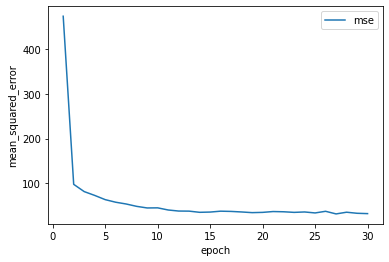

In [14]:
# MSE 학습 그래프
import matplotlib.pyplot as plt

plt.plot(epoch, mse, label = 'mse')
plt.xlabel('epoch')
plt.ylabel('mean_squared_error')
plt.legend()
plt.show()

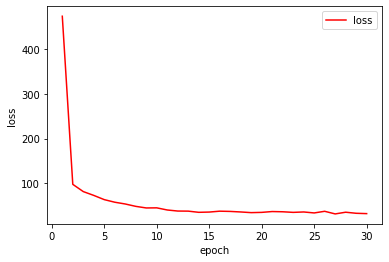

In [15]:
# 손실 학습 그래프
import matplotlib.pyplot as plt

plt.plot(epoch, loss, 'r', label = 'loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [17]:
# 실제값, 예측값 데이터 프레임 생성
pred_y = model.predict(x_te).flatten() # flatten() : 예측값을 펼치는 것을 의미, 데이터 프레임을 만들기 위함
print(pred_y)

# 데이터 프레임 생성을 위한 Pandas 라이브러리
import pandas as pd

res_df = pd.DataFrame(pred_y, columns = ['predict_val']) # 예측값을 이용해 데이터 프레임 생성
res_df['real_val'] = y_te # 실제값을 새로운 열로 추가
res_df.head(3) # 생성된 데이터 프레임 확인

df_sort = res_df.sort_values(["predict_val"], ascending = True) # 예측값의 기준을 오름차순으로 정렬
df_sort.head(3) # 예측값을 기준으로 오름차순이 된 데이터 프레임 결과 확인

[14.985907  17.722858  26.276215   7.8781705 15.060705  20.336605
 11.602329  22.116417  13.268801   7.8540196  5.0887647  9.5856285
 10.8198395  2.637917  33.327614  22.744896  13.659298  29.577385
 24.691822  21.305126  22.913738  16.998653  16.071018  26.362679
 21.458807  10.705963  17.394463  10.996267  28.356056  15.085167
 10.755394  12.818447  17.777937  20.254642  24.837711  13.036533
  4.2204633 17.00565    6.434193   6.45517   22.600845  18.922688
 12.991327   9.808994  17.064798  23.845364  16.277933  14.536419
  7.7061467 20.49448    7.738854  11.103327  19.002756  22.431572
  7.748492  15.4182    17.317778  10.086557  14.948185  18.089859
 16.191046  18.737839  25.028482  24.202707   9.018105  24.219604
 11.716774  13.978583   8.457424  20.773361  15.849079  17.648874
 26.901308  23.90348   16.912735  -1.1799694 27.15009   20.387608
 23.060745  16.443514  22.725914  17.230642  14.859665  28.543371
 28.260939  21.94674   20.232273   4.786793  24.304674   8.996201
  9.67192

,predict_val,real_val
116,-3.899990,8.4
96,-2.957386,13.8
75,-1.179969,7.4


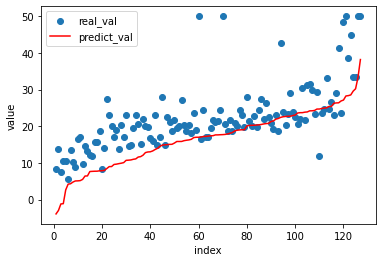

In [20]:
# 예측값, 실제값 그래프
import matplotlib.pyplot as plt
import numpy as np

idx = np.arange(1, len(df_sort) + 1)
plt.scatter(idx, df_sort['real_val'], marker = 'o', label = 'real_val')
plt.plot(idx, df_sort['predict_val'], color = 'r', label = 'predict_val')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()